# 内容提要
### 1.装饰器
### 2.对象周期
### 3.内存管理机制

## 1.装饰器

In [1]:
def check_func(func):
    def inner_func():
        print("Check something first...")
        func()
    return inner_func

@check_func
def eat_food():
    print("Eat food")
    
eat_food()

Check something first...
Eat food


In [2]:
# 上述的这个相当于

def check_func(func):
    def inner_func():
        print("Check something first...")
        func()
    return inner_func


def eat_food():
    print("Eat food")
    
f = check_func(eat_food)
f()


Check something first...
Eat food


In [6]:
# 也可以用对象实现

class Checker(object):
    def __init__(self, func):
        self.f = func
        
    def __call__(self, *args, **kwargs):
        print("Check something first...")
        self.f()

@Checker
def eat_foods():
    print("Eat foods")
    
eat_foods()       

Check something first...
Eat foods


## 2.对象周期

### 1）__ new __ 方法： 创建对象时，用于给对象分配内存的方法。通过拦截这个方法，可以修改对象的创建过程，比如单例模式

In [8]:
class Person(object):
    pass
        
class FakePerson(object):
    def __new__(cls, *args, **kwargs):
        print("Aha...")

real_person = Person()
fake_person = FakePerson()

print(real_person) 
print(fake_person)   #对象没被创建

Aha...
None


### 2) __init__方法：对象创建好之后，对其进行初始化
### 3) __del__方法：对象销毁时的操作

【注】引用全局变量时需要加global
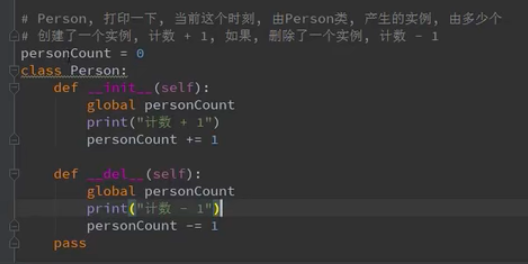

上述这种可以改成类属性，注意不是 self.属性 而是 类名.属性
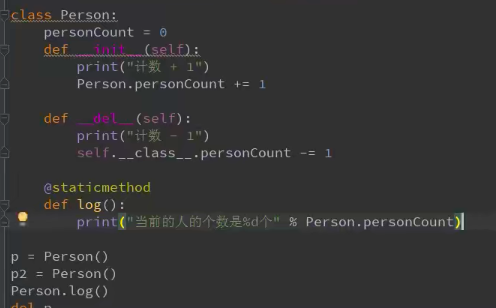
上述静态方法也可以换成类方法。注意用cls

## 3.内存管理机制

### 1）存储方面

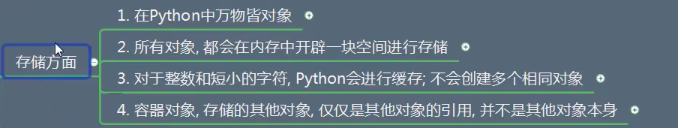

1.不存在基本的数据类型，它们全是对象  
2.变量存的都是对象的引用，id()为十进制地址，hex()对应为16进制地址  
3.具体见下：它们都用的同一个


In [16]:
p = 1
j = 1
print(id(p),"  ",id(j))  # 常用的会是这样，都是预先缓存的

a = 700
k = 700
print(id(a),"  ",id(k))  # 不常用的就不一样了

4368169152    4368169152
4449687024    4449688368


### 2）引用计数